In this notebook I used mnist dataset for classification of multiclass. Here I used ANN architecture for classification of images of numbers with different styles,And also discussed the effect of some hyperparamters such as learning rate,L2 regularizer and weight initializers on the model (Exploding Gradient and Vanishing Gradient).

In [3]:
#Load required libraries
import tensorflow as tf
import numpy as np

In [4]:
#load mnist dataset from the tensorflow.keras
from tensorflow.keras.datasets import mnist
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

11493376/11490434 [==============================] - 8s 1us/step


In [6]:
#print shapes
print('xtrain shape:',xtrain.shape)
print('ytrain shape:',ytrain.shape)
print('xtest shape:',xtest.shape)
print('ytest shape:',ytest.shape)

xtrain shape: (60000, 28, 28)
ytrain shape: (60000,)
xtest shape: (10000, 28, 28)
ytest shape: (10000,)


In [ ]:
#here 60000 is samples,28*28 is shape of the each image

In [15]:
#print shape of first image 
print(xtrain[0].shape)

(28, 28)


Class of this image is: 5


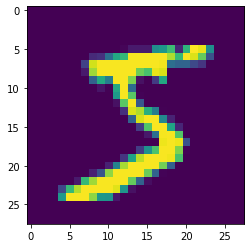

In [9]:
from matplotlib import pyplot as plt
plt.imshow(xtrain[0,:,:])
print('Class of this image is:',ytrain[0])

In [11]:
#reshape xtrain,xtest as row vector
x_train=xtrain.reshape(60000,28*28)
x_test=xtest.reshape(10000,28*28)

In [12]:
#Scaling
x_train=x_train/255
x_test=x_test/255

In [13]:
#Encode the ytrain,ytest 
y_train=tf.keras.utils.to_categorical(ytrain,num_classes=10)
y_test=tf.keras.utils.to_categorical(ytest,num_classes=10)

In [14]:
#print y_train for checking the ytrain as encoded or not
print(y_train)  #yes encoded

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


#### Build a model

In [16]:
#import required libraries for model building
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers,optimizers

In [ ]:
#training

In [99]:
def train_and_test_model(iterations,lr,lamda):
    
    #Define parameters
    iterations=iterations
    learning_rate=lr
    hidden_nodes=256
    output_nodes=10
    
    #Build model
    model=Sequential()
    #input_shape=28*28,units=number of hidden neurons required in first hidden layers
    model.add(Dense(units=hidden_nodes,activation='relu',input_shape=(784,)))
    #Define second hidden layers,here input_shape is not required becoz layer is sequential so it will remember last layers output nodes.
    #those output nodes are becomes input_shape for the next layer
    model.add(Dense(units=hidden_nodes,activation='relu'))
    #Define output layer,here activation function is softmax bcoz we have 10 classes in dataset
    #and introduce l2 regularization
    model.add(Dense(units=output_nodes,activation='softmax',kernel_regularizer=regularizers.l2(lamda)))
    
    #Define optimizer
    #first define sgd 
    sgd=optimizers.SGD(lr=learning_rate)
    model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer=sgd)
    
    #fit model
    #I dont want to print the report at each batch(use verbose=0)  # want to see verbose=1
    model.fit(x_train,y_train,epochs=iterations,batch_size=1000,verbose=0)
    #print the report after running all epochs
    [loss,score]=model.evaluate(x_train,y_train)
    
    return score
    

In [ ]:
#learning rate

In [90]:
#lets give paramters values and check 
lr=0.0001
lamda=0  # no regularization
train_and_test_model(25,lr,lamda)

1875/1875 [==============================] - 1s 670us/step - loss: 2.2525 - accuracy: 0.1728


0.17284999787807465

In [ ]:
#for lr=0.0001 lamda=0 accuracy of the model is 17.28% for 25 epochs.

In [91]:
#now change the lr value to 0.001
lr=0.001
lamda=0  # no regularization
train_and_test_model(25,lr,lamda)

1875/1875 [==============================] - 1s 666us/step - loss: 1.4051 - accuracy: 0.7344


0.734416663646698

In [ ]:
#lr=0.001,lamda=0 accuracy of the model is 73.4% 

In [92]:
#now change the lr value to 0.1
lr=0.1
lamda=0  # no regularization
train_and_test_model(25,lr,lamda)

1875/1875 [==============================] - 1s 692us/step - loss: 0.1130 - accuracy: 0.9686


0.9685666561126709

In [ ]:
#With the reducing of learning rate model accuracy is increased to 96.8%

In [93]:
#now change the lr value to 1
lr=1
lamda=0  # no regularization
train_and_test_model(25,lr,lamda)

1875/1875 [==============================] - 1s 674us/step - loss: 0.3010 - accuracy: 0.9105


0.9104666709899902

In [ ]:
#Accuracy got dropped due to the increase of learning rate.

In [95]:
#now change the lr value to 20
lr=20
lamda=0  # no regularization
train_and_test_model(25,lr,lamda)   #this problems is called exploding gradient(loss is more)

1875/1875 [==============================] - 1s 680us/step - loss: 2.3488 - accuracy: 0.0992


0.09920000284910202

In [ ]:
#Due to the high learning rate of the model ,accuracy is not good and this problem is know as Exploding gradient.

In [98]:
 #now change the lr value to 0.0000000001
lr=0.0000000001
lamda=0  # no regularization
train_and_test_model(25,lr,lamda)   #this problems is called vanishing gradient(loss is more)

Epoch 1/25
60/60 [==============================] - 1s 14ms/step - loss: 2.3611 - accuracy: 0.0997
Epoch 2/25
60/60 [==============================] - 1s 12ms/step - loss: 2.3601 - accuracy: 0.0992
Epoch 3/25
60/60 [==============================] - 1s 12ms/step - loss: 2.3593 - accuracy: 0.0993
Epoch 4/25
60/60 [==============================] - 1s 12ms/step - loss: 2.3617 - accuracy: 0.0988
Epoch 5/25
60/60 [==============================] - 1s 13ms/step - loss: 2.3581 - accuracy: 0.1004
Epoch 6/25
60/60 [==============================] - 1s 11ms/step - loss: 2.3593 - accuracy: 0.1018
Epoch 7/25
60/60 [==============================] - 1s 13ms/step - loss: 2.3608 - accuracy: 0.0987
Epoch 8/25
60/60 [==============================] - 1s 12ms/step - loss: 2.3601 - accuracy: 0.1009
Epoch 9/25
60/60 [==============================] - 1s 11ms/step - loss: 2.3616 - accuracy: 0.0999
Epoch 10/25
60/60 [==============================] - 1s 12ms/step - loss: 2.3601 - accuracy: 0.0992
Epoch 11/

0.09973333030939102

In [ ]:
#here is loss is remains same for all epochs.. this called vanishing gradient 

#### L2-regularizers

In [100]:
#now give the lambda value
lr=0.1
lamda=0.1  #  regularization
train_and_test_model(25,lr,lamda)

1875/1875 [==============================] - 1s 675us/step - loss: 0.3980 - accuracy: 0.9171


0.9170500040054321

In [105]:
lr=0.1
lamda=1  #  regularization
train_and_test_model(25,lr,lamda)

1875/1875 [==============================] - 2s 896us/step - loss: 0.7921 - accuracy: 0.8625


0.8624666929244995

In [ ]:
#try different lambda values
#lamda=0.1:accuracy is 91.7%
#lamda=0.01:accuracy is 94.62%
#lamda=0.001:accuracy is 96.51%
#lamda=0.0001:accuracy is 96.93%
#lamda=0.00001:accuracy is 96.78%
#lamda=1:accuracy is 82.24%
#increasing or decreasing of lambda value to a greater extends,accuracy will get reduce so be caution with lambda value

In [ ]:
#testing

In [106]:
def train_and_test_model(iterations,lr,lamda):
    
    #Define parameters
    iterations=iterations
    learning_rate=lr
    hidden_nodes=256
    output_nodes=10
    
    #Build model
    model=Sequential()
    #input_shape=28*28,units=number of hidden neurons required in first hidden layers
    model.add(Dense(units=hidden_nodes,activation='relu',input_shape=(784,)))
    #Define second hidden layers,here input_shape is not required becoz layer is sequential so it will remember last layers output nodes.
    #those output nodes are becomes input_shape for the next layer
    model.add(Dense(units=hidden_nodes,activation='relu'))
    #Define output layer,here activation function is softmax bcoz we have 10 classes in classification
    #and introduce l2 regularization
    model.add(Dense(units=output_nodes,activation='softmax',kernel_regularizer=regularizers.l2(lamda)))
    
    #Define optimizer
    #first define sgd 
    sgd=optimizers.SGD(lr=learning_rate)
    model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer=sgd)
    
    #fit model
    #If I dont want to print the report at each batch(use verbose=0)  # if you want to see verbose=1
    model.fit(x_train,y_train,epochs=iterations,batch_size=1000,verbose=0)
    #print the report after running all epochs
    [loss,train_score]=model.evaluate(x_train,y_train)
    [loss,test_score]=model.evaluate(x_test,y_test)
    
    return train_score,test_score

In [108]:
lr=0.1
lamda=0.0001  #  regularization
train_and_test_model(25,lr,lamda) #less overfitting

313/313 [==============================] - 2s 1ms/step - loss: 0.1322 - accuracy: 0.9623


(0.9671833515167236, 0.9623000025749207)

*Interpretation:*
    
   This model is free of overfitting issue because both train and test accuracy are same.

In [109]:
lr=0.1
lamda=10   #  regularization
train_and_test_model(25,lr,lamda) # underfitting 

313/313 [==============================] - 1s 1ms/step - loss: 217.5608 - accuracy: 0.1351


(0.13163332641124725, 0.13510000705718994)

In [ ]:
#This model is underfitting

#### HyperParameter Tuning

In [110]:
#Coarse tuning
import math 
for k in range(1,10):
    lr=math.pow(10,np.random.uniform(-7.0,3.0))
    lamda=math.pow(10,np.random.uniform(-7,-2))

    best_acc=train_and_test_model(10,lr,lamda)
    
    print('k:',k,'epocs:',100,'accuracy:',best_acc,'alpha:',lr,'Regularization:',lamda)

313/313 [==============================] - 0s 1ms/step - loss: 0.1640 - accuracy: 0.9611
k: 1 epocs: 100 accuracy: (0.9672999978065491, 0.9610999822616577) alpha: 0.2902043822654981 Regularization: 0.0014144062948781258
313/313 [==============================] - 0s 1ms/step - loss: 2.4233 - accuracy: 0.0731
k: 2 epocs: 100 accuracy: (0.06844999641180038, 0.0731000006198883) alpha: 1.1787137358188025e-05 Regularization: 2.716798682745542e-05
313/313 [==============================] - 0s 1ms/step - loss: 2.1894 - accuracy: 0.5312
k: 3 epocs: 100 accuracy: (0.5169666409492493, 0.5311999917030334) alpha: 0.0009173041145094651 Regularization: 0.009989352328536814
313/313 [==============================] - 1s 1ms/step - loss: 2.1358 - accuracy: 0.3803
k: 4 epocs: 100 accuracy: (0.3726833462715149, 0.38029998540878296) alpha: 0.0005455863401665111 Regularization: 1.0119515389150816e-06
313/313 [==============================] - 1s 1ms/step - loss: 1.9220 - accuracy: 0.5987
k: 5 epocs: 100 acc

*Interpretation:*
    
   alpha=0.29,regularization=0.0014144 for these values my model is giving the best result.
    
   

#### Weight Initailization

Some weights initializers are
1. GLOROT Uniform  (keras uses this weight initializer)

weigth_intializer=np.sqrt(3/(fan_avg))

fan_avg=(fav_in+fan_out)/2

2. He-normal

In [112]:
from tensorflow.keras.layers import Dropout

def tune_model(learning_rate,activation,dropout_rate,initializer,num_unit):

    
    model=Sequential()
    model.add(Dense(units=num_unit,activation=activation,kernel_initializer=initializer,input_shape=(784,)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units=num_unit,activation=activation,kernel_initializer=initializer))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units=10,activation='softmax',kernel_regularizer=regularizers.l2(lamda)))
    sgd=optimizers.SGD(lr=learning_rate)
    model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer=sgd)
    
    return model
    

In [113]:
#Lets define parameters
batch_size=[20,50,100][:1]
epochs=[1,20,50][:1]
initializer=['lecun_uniform','normal','he_normal','he_uniform'][:1]
learning_rate=[0.1,0.001,0.02][:1]
dropout_rate=[0.3,0.2,0.8][:1]
num_unit=[10,5][:1]
activation=['relu','tanh','sigmoid','hard_sigmoid','linear'][:1]

In [114]:
parameters=dict(batch_size=batch_size,
               epochs=epochs,
               learning_rate=learning_rate,
               dropout_rate=dropout_rate,
               num_unit=num_unit,
               initializer=initializer,
               activation=activation)

In [115]:
#This package converts to model into scikit learn form
model=tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=tune_model,verbose=0)

In [116]:
#Now model is converted to scikit learn form, so now we can apply grid search cv on it.

from sklearn.model_selection import GridSearchCV
models=GridSearchCV(estimator=model,param_grid=parameters,n_jobs=1)

In [117]:
best_model=models.fit(x_train,y_train)
print('Best model:',best_model.best_params_)

Best model: {'activation': 'relu', 'batch_size': 20, 'dropout_rate': 0.3, 'epochs': 1, 'initializer': 'lecun_uniform', 'learning_rate': 0.1, 'num_unit': 10}


In [120]:
best_model.best_score_

0.8328666687011719

In [ ]:
#For these values my model is giving 83.28%.

                                              ---Thank you---